<a href="https://colab.research.google.com/github/extrajp2014/DS-Unit-2-Sprint-1-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [2]:
import math
import numpy as np
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.__version__

sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]
def sqrt(n):
  return n ** 0.5

def mean_variance_stdev(items):
  length=len(items)
  mean = sum(items) / length
  difference = [i - mean for i in items]
  sqdifference = [i ** 2 for i in difference]
  variance = sum(sqdifference)/(length-1) # dof n-1 for samples
  stdev = variance ** 0.5
  return  mean, variance, stdev

print("mean is ",mean_variance_stdev(sales)[0])
print("variance is ",mean_variance_stdev(sales)[1])
print("stdev is ",mean_variance_stdev(sales)[2])
print("------------")
print("np.mean is ",np.mean(sales))
print("np.var ",np.var(sales,ddof=1))
print("np.stdev is ",np.std(sales,ddof=1))


mean is  3052.714285714286
variance is  214387.90476190473
stdev is  463.0204150595357
------------
np.mean is  3052.714285714286
np.var  214387.90476190473
np.stdev is  463.0204150595357


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [26]:
# df method
data = {'Sales': [3505, 2400, 3027, 2798, 3700, 3250, 2689],
        'Customers' : [127, 80, 105, 92, 120, 115, 93]
       }
df = pd.DataFrame(data)

# Dataframe use doff=1 for .cov
print(df.cov().iloc[:1]['Sales'][0])

7604.357142857142


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [35]:
covariance = df.cov().iloc[:1]['Sales'][0]
sales_std = mean_variance_stdev(df['Sales'])[2]
customers_std = mean_variance_stdev(df['Customers'])[2]
corr_coef = covariance / (sales_std * customers_std)

# Using doff=1
print(covariance / (sales_std * customers_std))
print("------Verify Numpy------")
print(np.corrcoef(df['Sales'],df['Customers'])[0][1])
print("------Verify Pandas------")
print(df.corr()['Sales']['Customers'])

0.9628339778148909
------Verify Numpy------
0.9628339778148909
------Verify Pandas------
0.9628339778148908


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [4]:
titanic = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')
titanic.head()

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [30]:
titanic.var()

Unnamed: 0          143117.500000
pclass                   0.701969
survived                 0.236250
age                    165.850021
sibsp                    1.085052
parch                    0.749195
fare                  2678.959738
body                  9544.688567
has_cabin_number         0.174613
dtype: float64

In [31]:
titanic.cov()

-179.16468392857143

# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

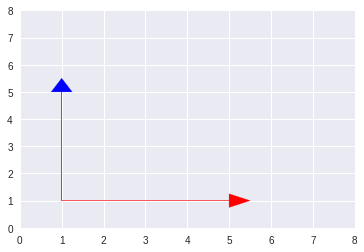

In [7]:
v1 = (4,0)
v2 = (0,4)
plt.axis([0,8,0,8])
plt.arrow(1,1, v1[0], v1[1],head_width=.5, head_length=0.5, color ='r')
plt.arrow(1,1, v2[0], v2[1],head_width=.5, head_length=0.5, color ='b')
plt.show()
# perpendicular

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [8]:
import numpy as np
a=[-5,3,7]
b=[6,-8,2]
print(np.dot(a,b))
#no, dot != 0

-40


## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [9]:
c=[2,-15,6,20]
def sqrt(n):
  return n ** 0.5

print(np.linalg.norm(c) ** 2)
print(np.dot(c,c))
print(np.matmul(np.transpose(c),c))

# All equal to sum of their squared components.

665.0
665
665


# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

d= 7i +12j

e= 2i + 11j - 8k

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [10]:
f=[4,12,11,9,2]
print(f/np.linalg.norm(f))
# f times inv of norm_f

[0.20908335 0.62725005 0.57497921 0.47043754 0.10454167]


# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

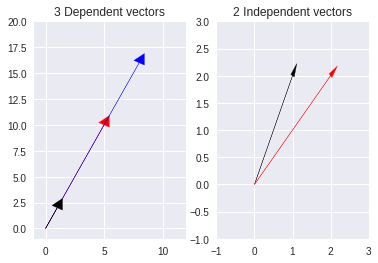

In [11]:
v1 = [1, 2]
scale = [5 , 8]
colors=['r','b','g','y']

plt.subplot(1,2,1)
plt.title("3 Dependent vectors")
plt.axis([-1,12,-1,20])
for i in range(len(scale)):
  temp=np.multiply(scale[i], v1)
  plt.arrow(0,0, temp[0], temp[1], head_width=1, head_length=1, color = colors[i])
plt.arrow(0,0, v1[0], v1[1], head_width=1, head_length=1, color = 'black');

plt.subplot(1,2,2)
plt.title("2 Independent vectors")
v1 = [1, 2]
v2 = [2, 2]
plt.axis([-1,3,-1,3])
plt.arrow(0,0, v1[0], v1[1], head_width=.1, head_length=.25, color = 'black')
plt.arrow(0,0, v2[0], v2[1], head_width=.1, head_length=.25, color = 'r');

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

1
1


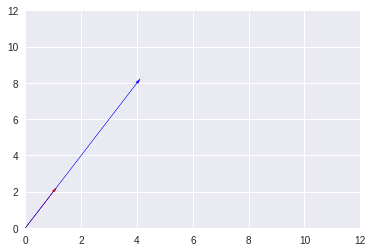

In [38]:
v1 = [1, 2]
v2 = [4, 8]

plt.axis([0,12,0,12])
plt.arrow(0,0, v1[0], v1[1], head_width=.1, head_length=.25, color = 'r')
plt.arrow(0,0, v2[0], v2[1], head_width=.1, head_length=.25, color = 'b')
# both are linear dependent, therefore span = R1

# Another way to look at it
print(np.linalg.matrix_rank(v1))
print(np.linalg.matrix_rank(v1))

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

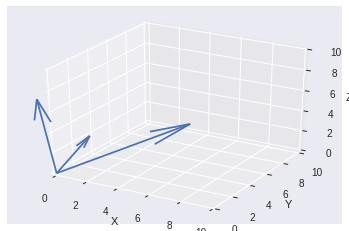

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

vectors = np.array([[0, 0, 0, 1, 2, 3], 
                    [0, 0, 0, -1, 0, 7],
                    [0, 0, 0, 4, 8, 2]])

X, Y, Z, U, V, W = zip(*vectors)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(X, Y, Z, U, V, W, length=1)
ax.set_xlim([0, 10])
ax.set_ylim([0, 10])
ax.set_zlim([0, 10])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()
# Linear independent, span = R3

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



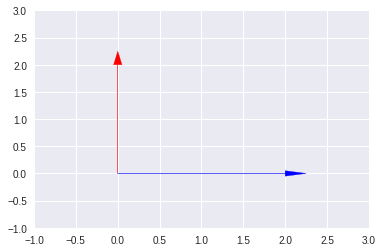

In [14]:
v1 = [0, 2]
v2 = [2, 0]

plt.axis([-1,3,-1,3])
plt.arrow(0,0, v1[0], v1[1], head_width=.1, head_length=.25, color = 'r')
plt.arrow(0,0, v2[0], v2[1], head_width=.1, head_length=.25, color = 'b')

## 6.2 What does it mean to form a basis?

Must be linear independent and span the vector space.

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [15]:
P = np.array([[1, 2, 3],
              [-1, 0, 7],
              [4, 8, 2]])
np.linalg.matrix_rank(P)

3

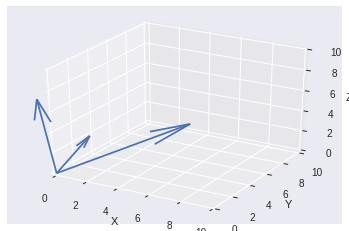

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

vectors = np.array([[0, 0, 0, 1, 2, 3], 
                    [0, 0, 0, -1, 0, 7],
                    [0, 0, 0, 4, 8, 2]])

X, Y, Z, U, V, W = zip(*vectors)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(X, Y, Z, U, V, W, length=1)
ax.set_xlim([0, 10])
ax.set_ylim([0, 10])
ax.set_zlim([0, 10])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()
# Linear independent, span = R3

## 7.2 What does the rank of a matrix tell us?

The rank of a matrix is the dimension of the vector space spanned by its columns.  Since its rank is 3 that means it spans R3.

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

0.0


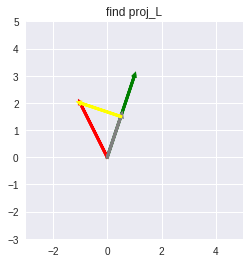

In [23]:
# Original Vector
v = [1, 3]
w = [-1, 2]
# lecture equation
# https://colab.research.google.com/drive/1pEjF3Md-wdE0NIAWKus5sA35wTiA-Ey9#scrollTo=fXBpFhuK0Kev
proj = np.multiply((np.dot(w,v) / np.dot(v,v)),v) # find projection shadow of w
x_minus_proj = w-proj # orthogonal line
print(np.dot(w-proj,v)) # orthogonal proof

# Set axes
plt.axes().set_aspect('equal')

# Plot Vectors and L
plt.axis([-3,5,-3,5])
plt.arrow(0, 0, v[0], v[1], linewidth=3, head_width=.05, head_length=0.05, color ='green')
plt.arrow(0, 0, w[0], w[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')
plt.arrow(0, 0, proj[0], proj[1], linewidth=3, head_width=.1, head_length=0.1, color ='gray')
plt.arrow(proj[0], proj[1], x_minus_proj[0], x_minus_proj[1], linewidth=3, head_width=.05, head_length=0.05, color = 'yellow')

plt.title("find proj_L")
plt.show();

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

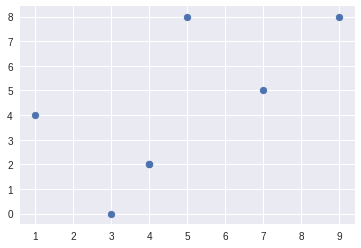

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()